In [4]:
from FinMind.data import DataLoader
import pandas as pd
import matplotlib.pyplot as plt
import requests

dl = DataLoader()
df = dl.taiwan_stock_daily(stock_id='0050', start_date='2003-01-01', end_date='2023-02-25')

df = df.rename(columns={"date": "Date"})
df.set_index("Date" , inplace=True)
df = df.rename(columns={"open": "Open", "max": "High", "min": "Low", "close": "Close", "Trading_Volume": "Volume"})
df = df.rename(columns={"Trading_Volume": "Volume"})
df = df.set_index(pd.DatetimeIndex(pd.to_datetime(df.index)))

In [5]:
token = pd.read_csv(r"C:\Users\Wade\Desktop\Jupyter_Python\finMindToken.txt")

In [6]:
url = "https://api.finmindtrade.com/api/v4/data?"
parameter = {
    "dataset": "CnnFearGreedIndex",
    "data_id": "2330",
    "start_date":"2024-04-01",
    "end_date":None,
    "token": token, 
}


resp = requests.get(url, params=parameter)
data = resp.json()

{'msg': 'success', 'status': 200, 'data': [{'date': '2024-04-01', 'fear_greed': 67, 'fear_greed_emotion': 'greed'}, {'date': '2024-04-02', 'fear_greed': 62, 'fear_greed_emotion': 'greed'}, {'date': '2024-04-03', 'fear_greed': 63, 'fear_greed_emotion': 'greed'}, {'date': '2024-04-04', 'fear_greed': 58, 'fear_greed_emotion': 'greed'}, {'date': '2024-04-05', 'fear_greed': 62, 'fear_greed_emotion': 'greed'}, {'date': '2024-04-08', 'fear_greed': 62, 'fear_greed_emotion': 'greed'}, {'date': '2024-04-09', 'fear_greed': 54, 'fear_greed_emotion': 'neutral'}, {'date': '2024-04-10', 'fear_greed': 51, 'fear_greed_emotion': 'neutral'}, {'date': '2024-04-11', 'fear_greed': 46, 'fear_greed_emotion': 'neutral'}, {'date': '2024-04-12', 'fear_greed': 46, 'fear_greed_emotion': 'neutral'}, {'date': '2024-04-15', 'fear_greed': 39, 'fear_greed_emotion': 'fear'}, {'date': '2024-04-16', 'fear_greed': 37, 'fear_greed_emotion': 'fear'}, {'date': '2024-04-17', 'fear_greed': 34, 'fear_greed_emotion': 'fear'}, {'d

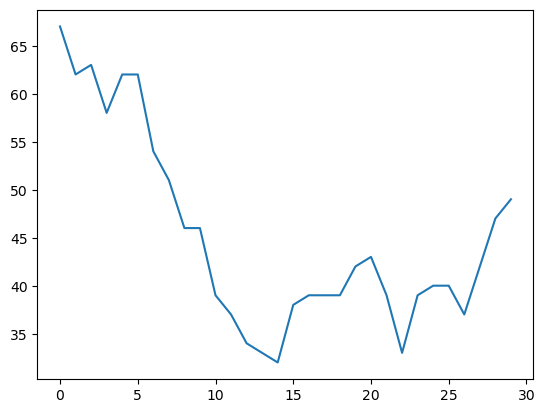

In [7]:
print(data)
fear_greed = [i["fear_greed"] for i in data["data"]]
plt.plot(fear_greed)